In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pytz import UTC  # import UTC timezone object
from scipy.stats import zscore


In [131]:
df = pd.read_csv("releases-data.csv")


In [132]:
df = df.dropna(subset=['published_at'])


In [133]:
df = df.dropna(subset=['published_at'])
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')


In [134]:
cutoff_date = pd.Timestamp('2005-04-19 09:55:00', tz=UTC)


In [135]:
df = df[df['published_at'] <= cutoff_date]



In [136]:
df = df.sort_values(by='published_at')
df['time_between_releases'] = df['published_at'].diff()
df.dropna(subset=['time_between_releases'], inplace=True)

In [138]:
desc_stats = df['time_between_releases'].describe()
desc_stats

count                            60
mean               20 days 15:11:00
std      47 days 00:10:04.849923613
min                 0 days 00:00:00
25%                 1 days 00:00:00
50%                 3 days 00:00:00
75%                26 days 18:00:00
max               338 days 00:00:00
Name: time_between_releases, dtype: object

In [76]:
print(df['time_between_releases'].isna().sum())  # Check for NaN values
print(df['time_between_releases'].dtype)  # Check data type

0
timedelta64[ns]


In [139]:
desc_stats.to_latex("releases-frequency.tex", escape=True)

In [26]:
latex_code = desc_stats.to_latex()


In [27]:
latex_code

'\\begin{tabular}{lr}\n\\toprule\n & time_between_releases \\\\\n\\midrule\ncount & 24.000000 \\\\\nmean & 4395600.000000 \\\\\nstd & 7787566.180722 \\\\\nmin & 0.000000 \\\\\n25% & 151200.000000 \\\\\n50% & 1425600.000000 \\\\\n75% & 3585600.000000 \\\\\nmax & 29203200.000000 \\\\\nz_value_mean & NaN \\\\\nz_value_std & NaN \\\\\n\\bottomrule\n\\end{tabular}\n'

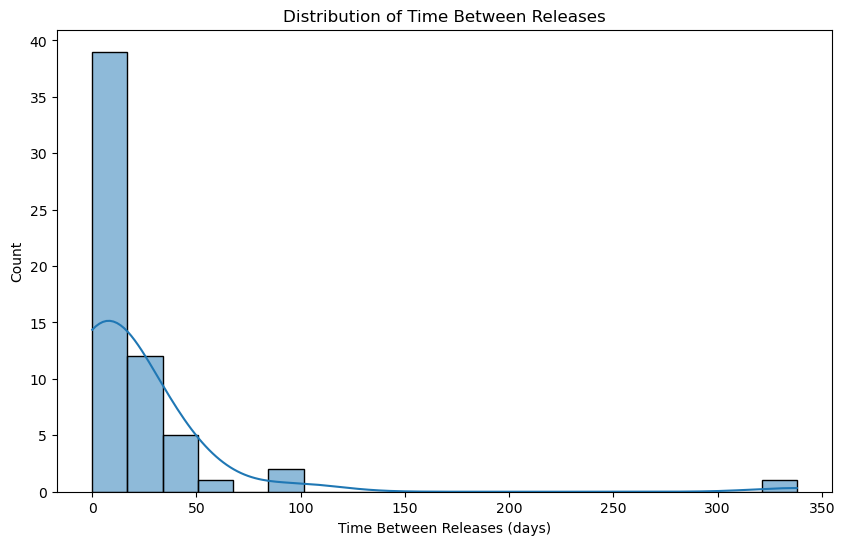

In [140]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_between_releases'].dt.total_seconds() / 86400, kde=True, bins=20)
plt.xlabel('Time Between Releases (days)')
plt.title('Distribution of Time Between Releases')
plt.savefig('time_between_releases_histogram.png')  # This line saves the figure
plt.show()